<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Vannskader_total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vannskadedata, skadekostnad Delta


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lese lokale filer


In [24]:
from google.colab import files
uploaded = files.upload()

Saving vannskade_delta_frost.csv to vannskade_delta_frost.csv
Saving vannskade_delta_inntrengning.csv to vannskade_delta_inntrengning.csv
Saving vannskade_delta_kjent.csv to vannskade_delta_kjent.csv
Saving vannskade_delta_lekkasje.csv to vannskade_delta_lekkasje.csv
Saving vannskade_delta_tilstopp.csv to vannskade_delta_tilstopp.csv
Saving vannskade_delta_ukjent.csv to vannskade_delta_ukjent.csv


# Enkel lineær regresjon 

In [4]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det

# Klargjøre data fra importerte filer 

In [25]:
navn = ['år','skadetype','skade']
år = np.arange(2000,2030,1)
kjent = pd.read_csv('vannskade_delta_kjent.csv',header=None,skiprows=1, names=navn)
inn = pd.read_csv('vannskade_delta_inntrengning.csv',header=None,skiprows=1, names=navn)
ukjent = pd.read_csv('vannskade_delta_ukjent.csv', header=None,skiprows=1,names=navn)
lekkasje = pd.read_csv('vannskade_delta_lekkasje.csv',header=None,skiprows=1,names=navn)
#total = pd.read_csv('vannskade_delta_alle_regn.csv',header=None,skiprows=1,names=navn)
frost = pd.read_csv('vannskade_delta_frost.csv', header=None,skiprows=1,names=navn)
til = pd.read_csv('vannskade_delta_tilstopp.csv', header=None,skiprows=1,names=navn)

data_kjent = []; data_ukjent = []; data_inn = []; data_lek = []; 
data_frost = []; data_til = [];
        
for i in år[:-9]:
    inn1 = inn.loc[inn['år']==i,'skade'].sum()
    kjent1 = kjent.loc[kjent['år']==i,'skade'].sum()
    ukjent1 = ukjent.loc[ukjent['år']==i,'skade'].sum()
    lekkasje1= lekkasje.loc[lekkasje['år']==i,'skade'].sum()
    #total1= total.loc[total['år']==i,'skade'].sum()
    frost1 = frost.loc[frost['år']==i,'skade'].sum()
    til1 = til.loc[til['år']==i,'skade'].sum()
    data_frost.append(frost1)
    data_til.append(til1)
    data_kjent.append(kjent1)
    data_ukjent.append(ukjent1)
    data_inn.append(inn1)
    data_lek.append(lekkasje1)
    #data_total.append(total1)
#løse problem med aksenavn, multipliser alle verdier med faktor
kjent2 = np.array([i*(10**(-6)) for i in data_kjent])
ukjent2 = np.array([i*(10**(-6)) for i in data_ukjent])
inn2 = np.array([i*(10**(-6)) for i in data_inn])
lekkasje2 = np.array([i*(10**(-6)) for i in data_lek])
#total2 = np.array([i*(10**(-6)) for i in data_total])
frost2 = np.array([i*(10**(-6)) for i in data_frost])
til2 = np.array([i*(10**(-6)) for i in data_til])

# Plotte data 

Kjent, ukjent, lekkasje og inntrenging med mulig reduskjonsfaktorer helt nederst. For alle er variablen "skadekost delta" fra Power BI brukt.

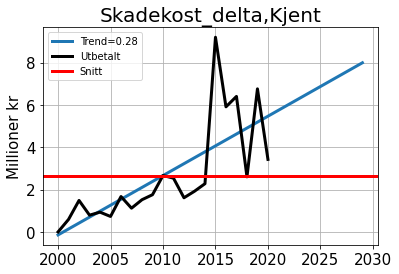

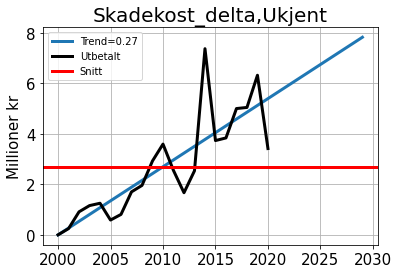

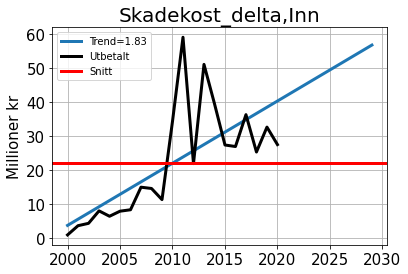

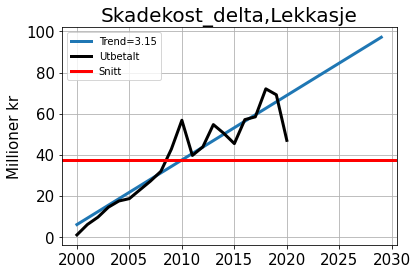

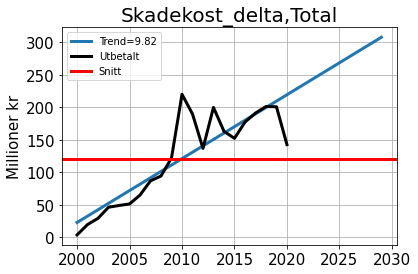

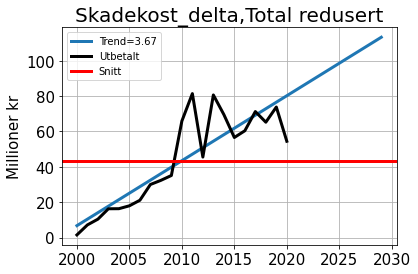

In [ ]:
#data_alle = np.array([data_kjent,data_ukjent,data_inn,data_lek,data_total]),
total_red = kjent2/2 + ukjent2/2 + inn2 + lekkasje2/2
data_new = np.array([kjent2, ukjent2, inn2, lekkasje2, total2, total_red])
tit = np.array(['Kjent','Ukjent','Inn','Lekkasje','Total','Total redusert'])
from matplotlib.ticker import ScalarFormatter
grid = np.array([0,1,2,3])
fig, ax = plt.subplots()#, figsize=(10,10))\n",
bins = np.linspace(0,50,10)
for i,j in zip(data_new,tit):
  snitt = np.mean(i)
  a,b = linreg(range(len(i)),i)  #//x=skade
  trendline=[a*index + b for index in range(len(år))]
  trend=round(a,2)
  plt.plot(år,trendline,label="Trend="+str(trend),linewidth=3)
  plt.plot(år[:-9],i,label="Utbetalt",color='k',linewidth=3)
  plt.axhline(y=snitt,color='r',label='Snitt',linewidth=3)
  plt.title("Skadekost_delta,"+str(j),size=20)
  plt.ylabel("Millioner kr",size=15)
  ax = plt.gca()
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  plt.grid(),plt.legend()
  #from google.colab import files\n",
  #plt.savefig(\"vannskade\"+str(j)+\".png\")\n",
  #files.download(\"vannskade\"+str(j)+\".png\")\n",
  plt.show()

# Plotte trend for alle mulig naturrlaterte vannskader
Skadekost delta; kjent, ukjent, lekkasje, frost, vann utenfra og tilstopp. 
Reduksjon av alle over med 70% som ansalg til hva mye som ernaturrlatert. 

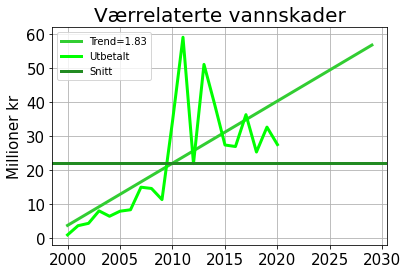

In [ ]:
from matplotlib.ticker import ScalarFormatter

tot = frost2+til2+inn2#+lekkasje2+kjent2+ukjent2
tot_red = kjent2*0.7+ukjent2*0.7+frost2*0.7+til2*0.7+inn2*0.7+lekkasje2*0.7 
da = np.array([tot,tot_red])
colo = np.array(['royalblue','lightsteelblue'])
fig, ax = plt.subplots()#, figsize=(10,10))\n",
#for i,j in zip(da,colo):
snitt = np.mean(tot)
a,b = linreg(range(len(tot)),tot)  #//x=skade
trendline=[a*index + b for index in range(len(år))]; trend=round(a,2)
plt.plot(år,trendline,label="Trend="+str(trend),color='limegreen',linewidth=3)
plt.plot(år[:-9],tot,label="Utbetalt",color='lime',linewidth=3)
plt.axhline(y=snitt,label='Snitt', color='forestgreen',linewidth=3)
plt.ylabel("Millioner kr",size=15)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.grid(),plt.legend()
plt.title("Værrelaterte vannskader",size=20)
plt.show()

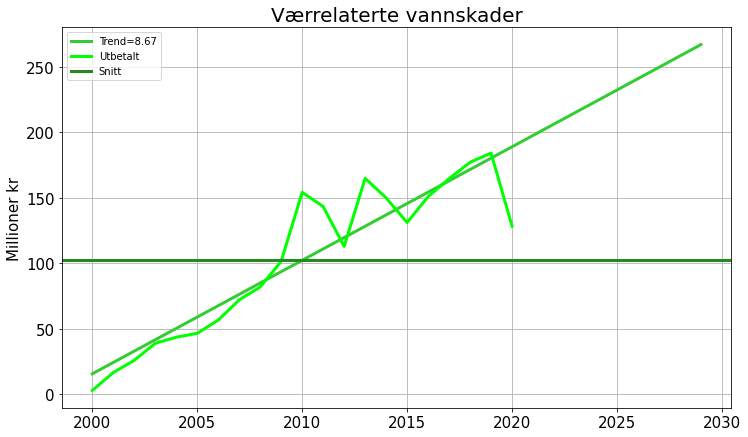

In [26]:
tot = frost2+til2+inn2+lekkasje2+kjent2+ukjent2
tot_red = kjent2*0.7+ukjent2*0.7+frost2*0.7+til2*0.7+inn2*0.7+lekkasje2*0.7 
da = np.array([tot,tot_red])
colo = np.array(['royalblue','lightsteelblue'])
fig, ax = plt.subplots(figsize=(12, 7))#, figsize=(10,10))\n",
#for i,j in zip(da,colo):
snitt = np.mean(tot)
a,b = linreg(range(len(tot)),tot)  #//x=skade
trendline=[a*index + b for index in range(len(år))]; trend=round(a,2)
plt.plot(år,trendline,label="Trend="+str(trend),color='limegreen',linewidth=3)
plt.plot(år[:-9],tot,label="Utbetalt",color='lime',linewidth=3)
plt.axhline(y=snitt,label='Snitt', color='forestgreen',linewidth=3)
plt.ylabel("Millioner kr",size=15)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.grid(),plt.legend()
plt.title("Værrelaterte vannskader",size=20)
plt.show()

# Histogram med data fra figur over

In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
col = ['mnd','skade','årsak']
alt = pd.read_csv('test.csv', header=None,skiprows=2,names=col)

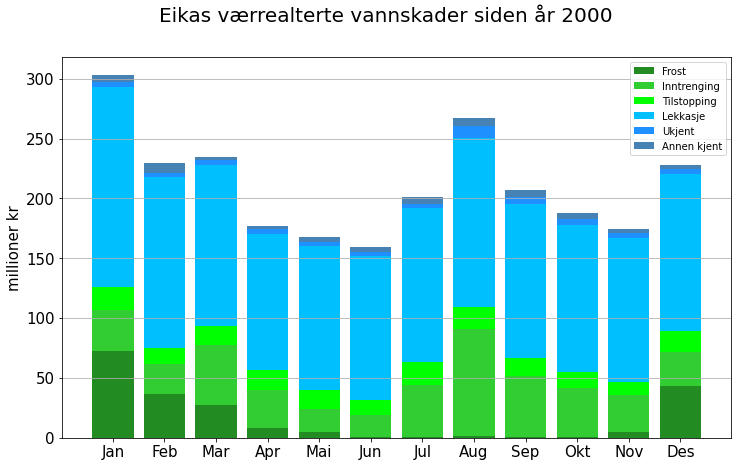

In [ ]:
#alle = pd.read_csv('vannskade_alle_måned.csv',header=None,skiprows=2,names=kol)
mnd = ['Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Des']

a = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Frost','skade']])
b = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Tilstopping','skade']])
c = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Vann utenfra','skade']])
d = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Lekkasje','skade']])
e = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Ukjent årsak','skade']])
f = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Annen kjent årsak','skade']])
#alle = np.array([i*(10**(-6)) for i in alle['skade']])

fig, ax = plt.subplots(figsize=(12, 7))
fig.suptitle('Eikas værrealterte vannskader siden år 2000',fontsize=20)

bar=ax.bar(mnd, a,color='forestgreen', label='Frost')
bar=ax.bar(mnd, c,bottom=a,color='limegreen', label='Inntrenging')
bar=ax.bar(mnd, b, bottom= a+c,color='lime', label='Tilstopping')
bar=ax.bar(mnd, d, bottom= a+c+b,color='deepskyblue', label='Lekkasje')
bar=ax.bar(mnd, e, bottom= a+b+c+d,color='dodgerblue', label='Ukjent')
bar=ax.bar(mnd, f, bottom= a+c+b+d+e,color='steelblue', label='Annen kjent')
ax.grid(axis='y')
ax.set_ylabel('millioner kr',size=15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
plt.legend()
#plt.savefig("vannskade_måned_alle.png",bbox_inches = 'tight')
#files.download("vannskade_måned_alle.png")
plt.show()

# Årlig fordeling av alle værrelaterte vannskader 

In [9]:
uploaded = files.upload()

Saving vannskade_delta_år_frost.csv to vannskade_delta_år_frost (1).csv
Saving vannskade_delta_år_inntrengning.csv to vannskade_delta_år_inntrengning (1).csv
Saving vannskade_delta_år_kjent.csv to vannskade_delta_år_kjent (2).csv
Saving vannskade_delta_år_lekkasje.csv to vannskade_delta_år_lekkasje (1).csv
Saving vannskade_delta_år_tilstopp.csv to vannskade_delta_år_tilstopp (1).csv
Saving vannskade_delta_år_ukjent.csv to vannskade_delta_år_ukjent (1).csv


In [14]:
col = ['år','dummy1','årsak','dummy2','skade'] 
år = np.arange(2000,2021,1)

In [17]:
lek = pd.read_csv('vannskade_delta_år_lekkasje.csv',header=None,skiprows=1,names=col)
kjent = pd.read_csv('vannskade_delta_år_kjent.csv',header=None,skiprows=1,names=col)
ukjent= pd.read_csv('vannskade_delta_år_ukjent.csv',header=None,skiprows=1,names=col)
til= pd.read_csv('vannskade_delta_år_tilstopp.csv',header=None,skiprows=1,names=col)
inn= pd.read_csv('vannskade_delta_år_inntrengning.csv',header=None,skiprows=1,names=col)
frost= pd.read_csv('vannskade_delta_år_frost.csv',header=None,skiprows=1,names=col)

data_lek = []; data_kjent = []; data_ukjent = [];
data_frost = []; data_til = []; data_inn = [];

for i in år:
  lek1 = lek.loc[lek['år']==i,'skade'].sum()
  kjent1 = kjent.loc[kjent['år']==i,'skade'].sum()
  ukjent1 = ukjent.loc[ukjent['år']==i,'skade'].sum()
  frost1 = frost.loc[frost['år']==i,'skade'].sum()
  inn1 = inn.loc[inn['år']==i,'skade'].sum()
  til1 = til.loc[til['år']==i,'skade'].sum()
  data_lek.append(lek1)
  data_kjent.append(kjent1)
  data_ukjent.append(ukjent1)
  data_frost.append(frost1)
  data_inn.append(inn1)
  data_til.append(til1)
#løse problem med aksenavn, multipliser alle verdier med faktor\n",
new_lek = np.array([i*(10**(-6)) for i in data_lek])
new_kjent = np.array([i*(10**(-6)) for i in data_kjent])
new_ukjent = np.array([i*(10**(-6)) for i in data_ukjent])
new_frost = np.array([i*(10**(-6)) for i in data_frost])
new_inn = np.array([i*(10**(-6)) for i in data_inn])
new_til = np.array([i*(10**(-6)) for i in data_til])

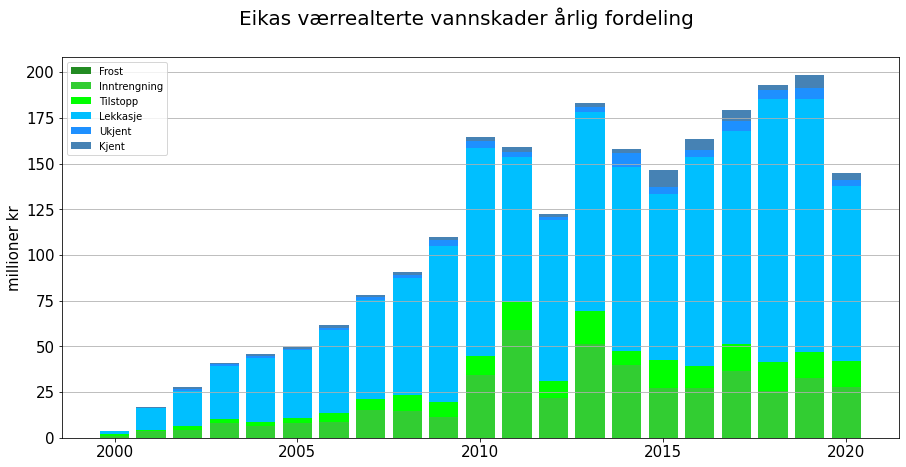

In [23]:
fig, ax = plt.subplots(figsize=(15, 7))

fig.suptitle('Eikas værrealterte vannskader årlig fordeling',fontsize=20)

ax.bar(år, new_frost, color='forestgreen',label='Frost')
ax.bar(år, new_inn,bottom=new_frost,color='limegreen', label='Inntrengning')
ax.bar(år, new_til, bottom= new_frost+new_inn,color='lime', label='Tilstopp')
ax.bar(år, new_lek, bottom=new_frost+new_inn+new_til,color='deepskyblue', label='Lekkasje')
ax.bar(år, new_ukjent,bottom=new_frost+new_inn+new_til+new_lek, color='dodgerblue', label='Ukjent')
ax.bar(år, new_kjent, bottom=new_frost+new_inn+new_til+new_lek+new_ukjent,color='steelblue', label='Kjent')

ax.grid(axis='y')
ax.set_ylabel('millioner kr',size=15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

ax.legend() ;plt.show()



# Månedlig fordeling av vannskader 
Annen kjent årsak, ukjent årsak, vann utenfra, lekkasje har distribusjon lik nedbørsdistribusjon. Frost har distribusjon som passer med temperaturdistribusjon. Tilstopping har ikke distribusjon likt noe, men burde medregnes. Samtlige av nevnte er relativt store. Størrelser er ca  Lekkasje>vann utenfra>tilstopp>frost>annen kjent=ukjent, hvor ukjent er i strorden 4-10 mill per måned mens lekkasje er strorden 100-150 mill per mnd.

## Ønsker bergene hvor mye penger som totalt går med fra disse skadeårsakene, og såbergene hvor mye det er snakk om dersom hver skadeårsak er vektet i forhold til omtrent hvor stor andel som er naturrelatert.

### Du kan bruke data i informo til dette! Sammenlikne skadesaker fra NICE med Informo for å se hvordan de er registrert. 

plottet over kan være en oversikt over hver enkelt skadeårsak.
Under her kan du plotte sum og vektet sum i en figur. Da blir det synlig hvor mye vi har brukt, og hvor mye som sansynligvis er naturrelatert. Det vil her være snakk om alle kilder og alle år. 